In [678]:
#Import all the required packages

In [679]:
#Pandas data is short for panel data that help to manipulate data in python
import pandas as pd
#Numpy is help to generate random numbers and do other many things
import numpy as np
#Preprocessing package from sklearn gives us functions for scaling the data before performing PCA
from sklearn.preprocessing import StandardScaler
#Use pyplot library as plt for the ploting data as graphs
import matplotlib.pyplot as plt 

In [680]:
#Import the Bread Cancer dataset

In [681]:
data = pd.read_csv("datafile.csv")

In [682]:
#Add feature columns headings to the dataset

In [683]:
data.columns = [ "Sample code number","Clump Thickness" ,"Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]

In [684]:
#Store new data set and load the new data set as data.csv file

In [685]:
data.to_csv("data.csv",index=None,header=True)

In [686]:
#Read the new dataset file and read it

In [687]:
df = pd.read_csv("data.csv")
print(df)

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1002945                5                        4   
1               1015425                3                        1   
2               1016277                6                        8   
3               1017023                4                        1   
4               1017122                8                       10   
..                  ...              ...                      ...   
693              776715                3                        1   
694              841769                2                        1   
695              888820                5                       10   
696              897471                4                        8   
697              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           4                  5                            7   
1        

In [688]:
#Get first 5 values in the table

In [689]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [690]:
# remove the 1st attribute from the table

In [691]:
#df['Class'].replace(2, '-1',inplace=True)
#df['Class'].replace(4, '+1',inplace=True)
df= df.drop(labels='Sample code number', axis=1)

In [692]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [693]:
#Get the value for the x any Y coordinates

In [694]:
x = df.drop(labels='Class', axis=1).values
y = df['Class'].values

In [695]:
print(y)

[2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 2 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4
 2 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4
 4 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2 2
 4 2 4 4 2 2 4 2 2 2 4 4 2 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2
 4 4 4 2 4 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4
 4 4 2 4 4 2 4 4 4 2 4 2 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 2 4 2 4 4 4 2 2 2 2
 4 4 4 4 4 2 4 4 4 2 4 2 4 4 2 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 4 2
 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 4 2 2 2 4 4 2 2 4 2 2 4 2 2 4 2 4 4 4 2 2 4
 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 4 2 4 2 4 2 2 2 2 4 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2
 2 2 2 2 4 2 2 2 4 2 4 4 4 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 4 4 2 2 2 4 4 4 2 4 2 4 

In [696]:
#Print the number of columns and rows for each x any y coordiante have

In [697]:
print(x.shape, y.shape)

(698, 9) (698,)


In [698]:
#Implementation of PCA with a covariance Matrix
#Define a class as convers_pca
class convers_pca():
  #initialize the number of components, eigen values and eigen vectors
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None

    # Generates the coordinates for a PCA graph bases on the mean and projection matrix data.
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    #transform the sources back to the mixed data (apply mixing matrix).
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    #Fit the data using self object and the train data x  array like sample that contains the number of samaples
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        # Translate the dataset so it's centered around 0
        self.mean = np.mean(x, axis=0)
        
        #Calculate the covariance matrix
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        #eigendecomposition get through using the eigen vectors and eigen values from the covariance matrix
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        #project data point onto selected eigen vector
        self.eigen_vectors = self.eigen_vectors.T
        
        #Indirect sort along the given axis
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        #This will show the amount of variance explained by each of the selected components
        self.explained_variance = self.eigen_values[self.sorted_components]
        #Percentage of variance explained by each selected array components
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [699]:
#Standardization of x
#remove the mean and scaling to unit variance using the standardscaler. It helps to rescaling feature vectors to all have the same scale
std = StandardScaler()
# From the fit_transorm, the training data will be  scale and help to scalaling parameters of that data
transformed = StandardScaler().fit_transform(x)

In [700]:
#PCA with 2 components

In [701]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

In [702]:
#Check eigenvectors:
pca.eigen_vectors

array([[-0.30310067, -0.38126622, -0.3775959 , -0.33288234, -0.33650078,
        -0.33281267, -0.34601646, -0.33582914, -0.22993715],
       [ 0.14683851,  0.04996567,  0.08537547,  0.0451648 , -0.16344088,
         0.24657009,  0.22983633, -0.02527518, -0.90864721],
       [-0.86136892,  0.02018775, -0.0339872 ,  0.42048697,  0.1115004 ,
        -0.00981834,  0.19953963,  0.13431518, -0.09636514],
       [-0.00171461, -0.73635575,  0.66496409,  0.04612633,  0.0680928 ,
        -0.07093334,  0.05815982, -0.01901694,  0.00774705],
       [-0.08017631,  0.20271494,  0.17669502, -0.46772118,  0.36284351,
        -0.55283289, -0.00309271,  0.45708292, -0.23723451],
       [-0.07704427,  0.13752162,  0.10472673, -0.04578593,  0.68871358,
         0.12979796, -0.25601287, -0.62255108, -0.13342268],
       [ 0.24433503, -0.43763268, -0.58395989,  0.12218393,  0.44802018,
        -0.11294782,  0.41442756,  0.07651006, -0.04191277],
       [ 0.26796657,  0.12185142,  0.05125207,  0.67105396, -0

In [703]:
#Check eigenvalues
pca.eigen_values

array([5.89532862, 0.77538511, 0.53923205, 0.0891049 , 0.46877132,
       0.38149275, 0.26206508, 0.30474987, 0.29678278])

In [704]:
#Check sorted component
pca.sorted_components

array([0, 1, 2, 4, 5, 7, 8, 6, 3], dtype=int64)

<Figure size 432x288 with 0 Axes>

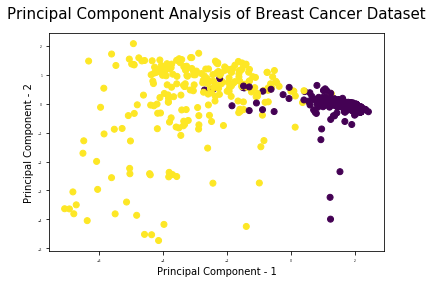

In [705]:
#transform method use the same mean and variance as it is calculated from the training data to transform the test data. 
x_std = pca.transform(transformed)
plt.figure()
plt.figure(figsize=(6, 4))
plt.xticks(fontsize=3)
plt.yticks(fontsize=3)
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=15, pad=15)
## Plot data points using their class
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)
